In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
import scipy.stats as stats
import numpy as np

In [3]:
#prefix = "mining"
#prefix = "obvious_jump"
prefix = "housing_change"

In [4]:
data = np.loadtxt(f"./{prefix}_data.txt")
R = np.loadtxt(f"{prefix}_r.txt")

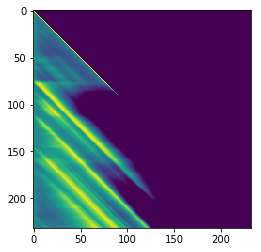

In [5]:
plt.imshow(np.log(R + 1E-15), cmap=cm.viridis)

Text(0, 0.5, 'MAP')

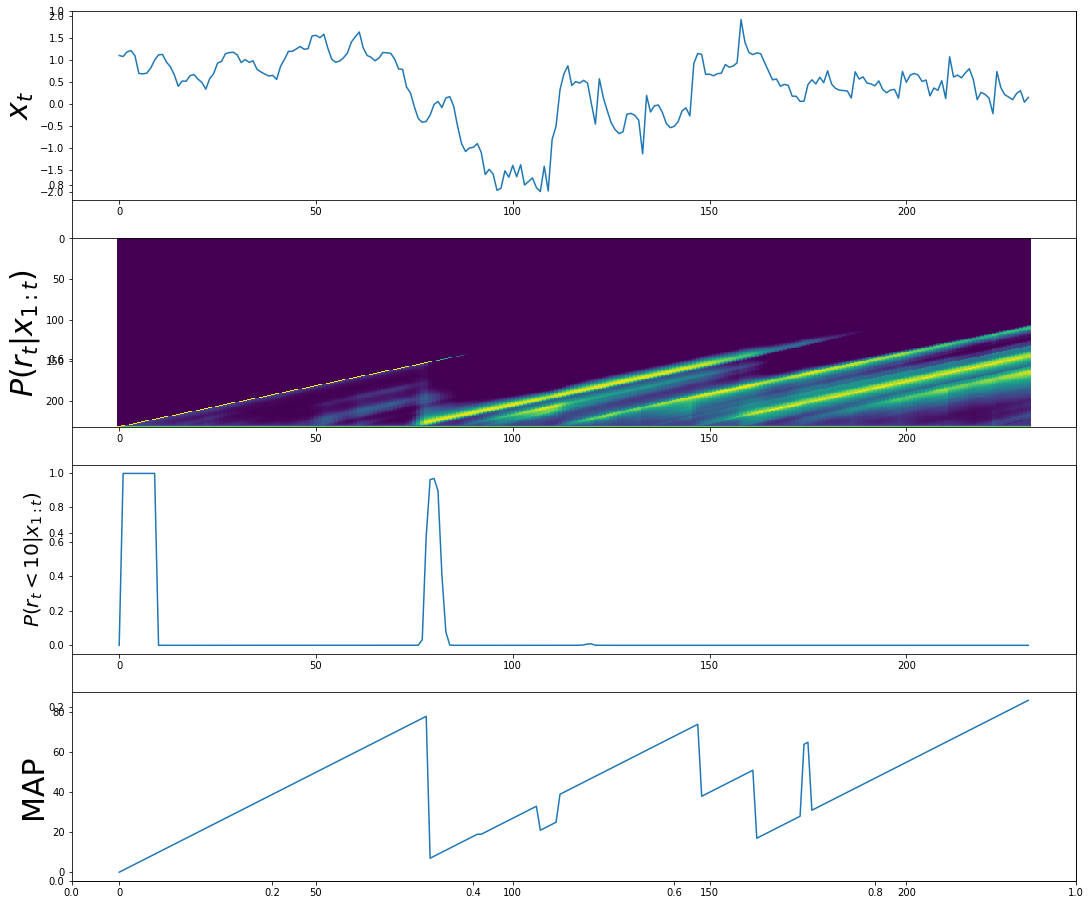

In [6]:
fig, ax = plt.subplots(figsize=[18, 16])

ax = fig.add_subplot(4, 1, 1)
ax.plot(data)
ax.set_ylabel("$x_t$", fontsize=30)

ax = fig.add_subplot(4, 1, 2, sharex=ax)
ax.imshow(
    -np.log(np.rot90(R + 1E-10, 1)),
    cmap=cm.viridis_r,
    aspect="auto",
)
ax.set_ylabel("$P(r_t|x_{1:t})$", fontsize=30)

ax = fig.add_subplot(4, 1, 3, sharex=ax)
w = 10
ax.plot(np.sum(R[:, 1:w], axis=1))
ax.set_ylabel(f"$P(r_t < {w}|x_{{1:t}})$", fontsize=20)

ax = fig.add_subplot(4, 1, 4, sharex=ax)
ax.plot(np.argmax(R, axis=1))
ax.set_ylabel("MAP", fontsize=30)

/home/schmidmt/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


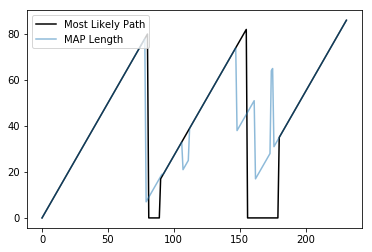

In [7]:
lr = np.log(R)
for i in range(lr.shape[1]-1):
    lr[i+1, 1:] += lr[i, :-1]
    lr[i+1, 0] += np.max(lr[i, :])
am = np.argmax(lr, axis=1)
plt.plot(am, c='k', label="Most Likely Path")
plt.plot(np.argmax(R, axis=1), alpha=0.5, label="MAP Length")
plt.legend()

/home/schmidmt/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/schmidmt/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/schmidmt/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


array([ 80, 155])

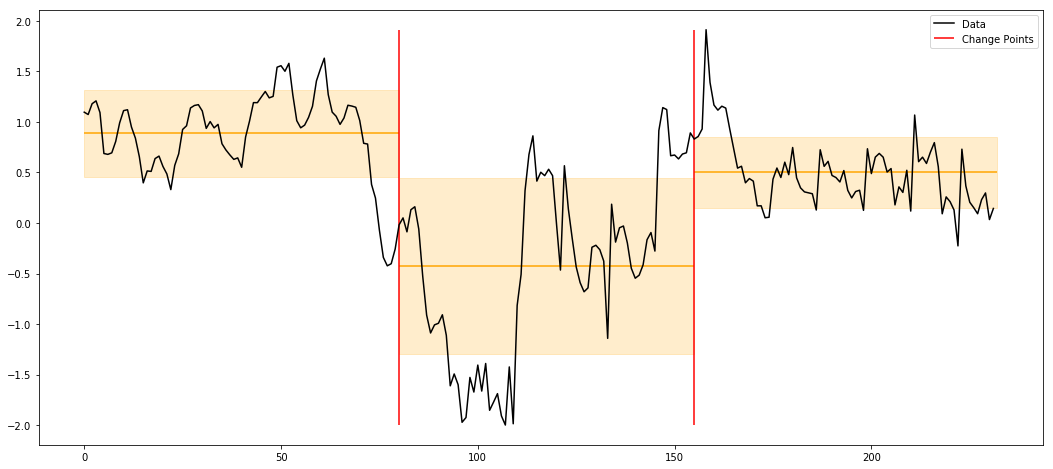

In [8]:
plt.figure(figsize=[18, 8])
plt.plot(data, label="Data", color="k")

change_points = np.where(am[1:] / am[:-1] < 0.5)[0]
#change_points = np.where(am == 0)[0][1:]
#change_points = np.where(am[1:] != 1 + am[:-1])[0]

limits = np.concatenate((np.array([0]), change_points, np.array([len(data)])))
for (i, (a, b)) in enumerate(zip(limits, limits[1:])):
    mean = np.mean(data[a:b])
    plt.hlines(mean, a, b, color='orange')
    sd = np.std(data[a:b])
    plt.fill_between([a, b], mean - sd, mean + sd, alpha=0.2, color="orange")
    
plt.vlines(
    x=change_points,
    ymin=np.min(data),
    ymax=np.max(data),
    label="Change Points",
    color="red"
)
plt.legend()
change_points